#  IRIS FLOWER CLASSIFICATION



### TASK 1

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

In [1]:
## importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## loading the dataset
df = pd.read_csv("D:\OASISINFB\Iris.csv") 

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
## columns of the dataset
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
## descriptive data of the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
## droping the id column from the dataset
df = df.drop(['Id'], axis =1)
print(df.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [8]:
## samples of each class
df['Species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
## checking for any null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
## datatypes
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### EXPLORATORY DATA ANALYSIS

In [11]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


**Distribution graphs of all species corresponding to their parameters like sepal length, width, petal length, width. To know the basic shape of the species comparitive to each other.**

<Axes: xlabel='SepalLengthCm', ylabel='Density'>

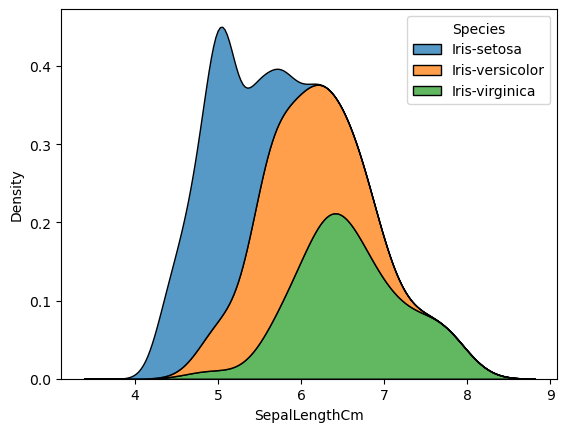

In [12]:
sns.kdeplot(data= df, x="SepalLengthCm", hue="Species", multiple="stack")

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

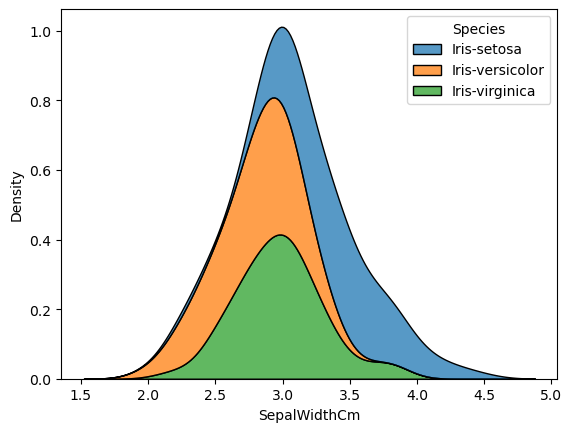

In [13]:
sns.kdeplot(data= df, x="SepalWidthCm", hue="Species", multiple="stack")

<Axes: xlabel='PetalLengthCm', ylabel='Density'>

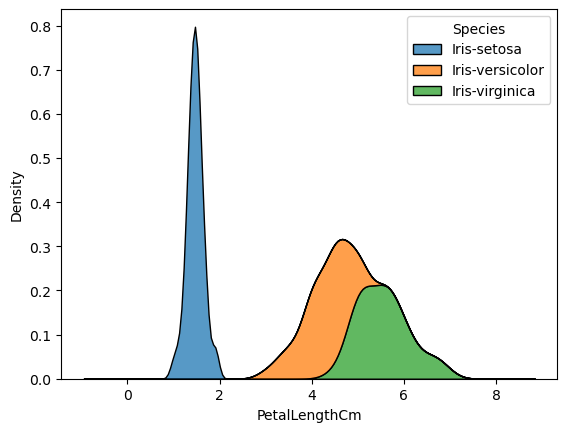

In [14]:
sns.kdeplot(data= df, x="PetalLengthCm", hue="Species", multiple="stack")

<Axes: xlabel='PetalWidthCm', ylabel='Density'>

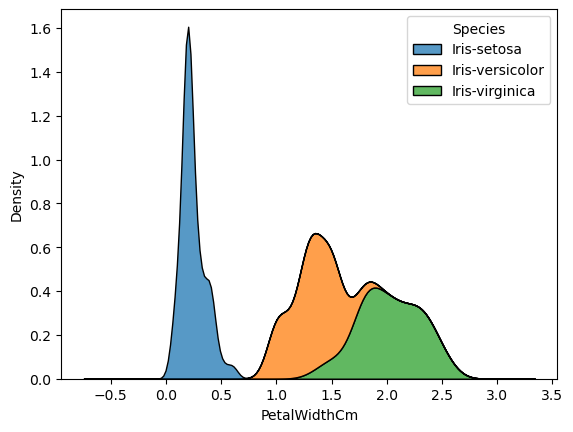

In [15]:
sns.kdeplot(data= df, x="PetalWidthCm", hue="Species", multiple="stack")

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

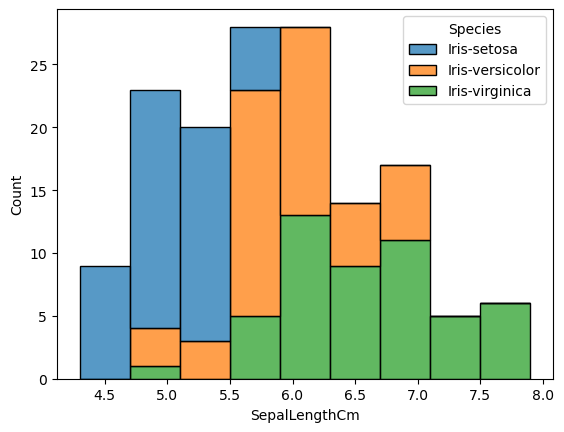

In [16]:
sns.histplot(data = df, x="SepalLengthCm", hue="Species", multiple="stack")

**Above graphs indicates that most of the plants collectively have their sepallength in the range of 5.5 to 6.3 cm.**


1. Iris-setosa : Mostly plants of these species have their sepallength in the range of 4.7 to 5.5 cm.
2. Iris-versicolor : Mostly plants of these species have their sepallength in the range of 5.5 to 6.3 cm.
3. Iris-virginica : Mostly plants of these species have their sepallength in the range of 5.9 to 6.3 cm.

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

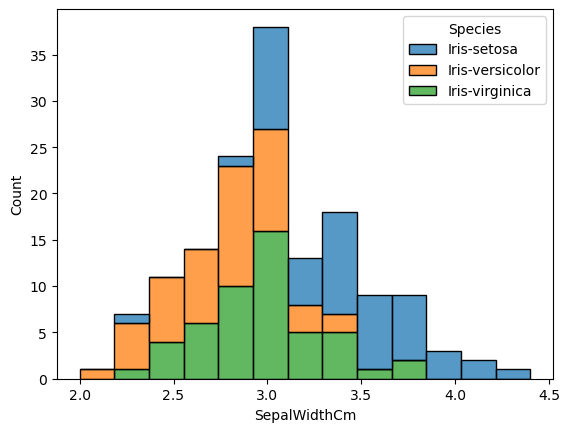

In [17]:
sns.histplot(data = df, x="SepalWidthCm", hue="Species", multiple="stack")

**Above graphs indicates that most of the plants collectively have their sepalwidth in the range of 2.9 to 3.2 cm.**

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

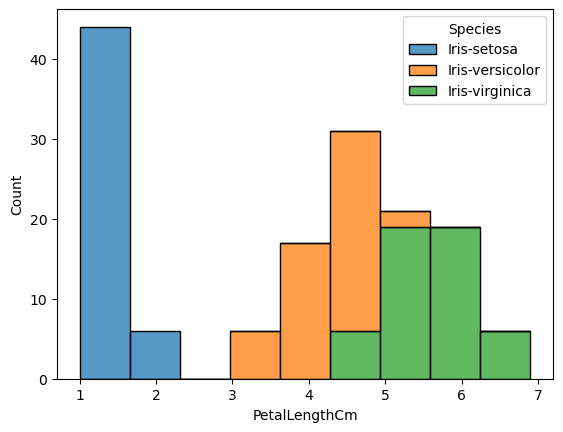

In [18]:
sns.histplot(data = df, x="PetalLengthCm", hue="Species", multiple="stack")

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

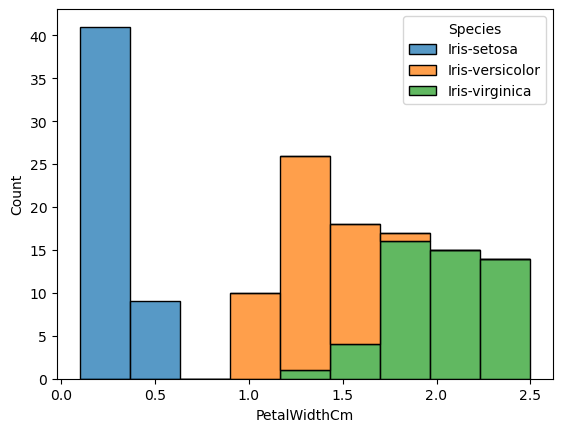

In [19]:
sns.histplot(data = df, x="PetalWidthCm", hue="Species", multiple="stack")

<Axes: ylabel='Species'>

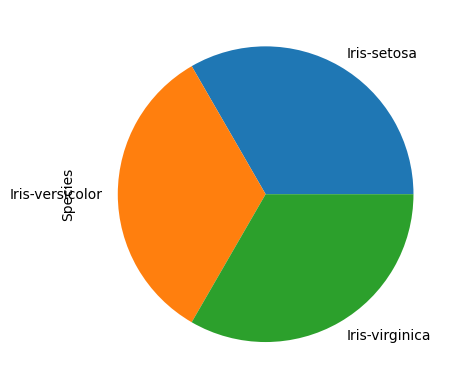

In [20]:
df['Species'].value_counts(normalize=True).plot.pie()

### Coorelation Matrix

1. A table showing co-relation coefficients between variables. 
2. Each cell in the table shows the co-relation between two variables.
3. The value is in the range of -1 to 1. If two variables have high co-relation, we can neglect one variable from those two.

In [21]:
df.corr()

C:\Users\aatwi\AppData\Local\Temp\ipykernel_52784\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


C:\Users\aatwi\AppData\Local\Temp\ipykernel_52784\1560742575.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

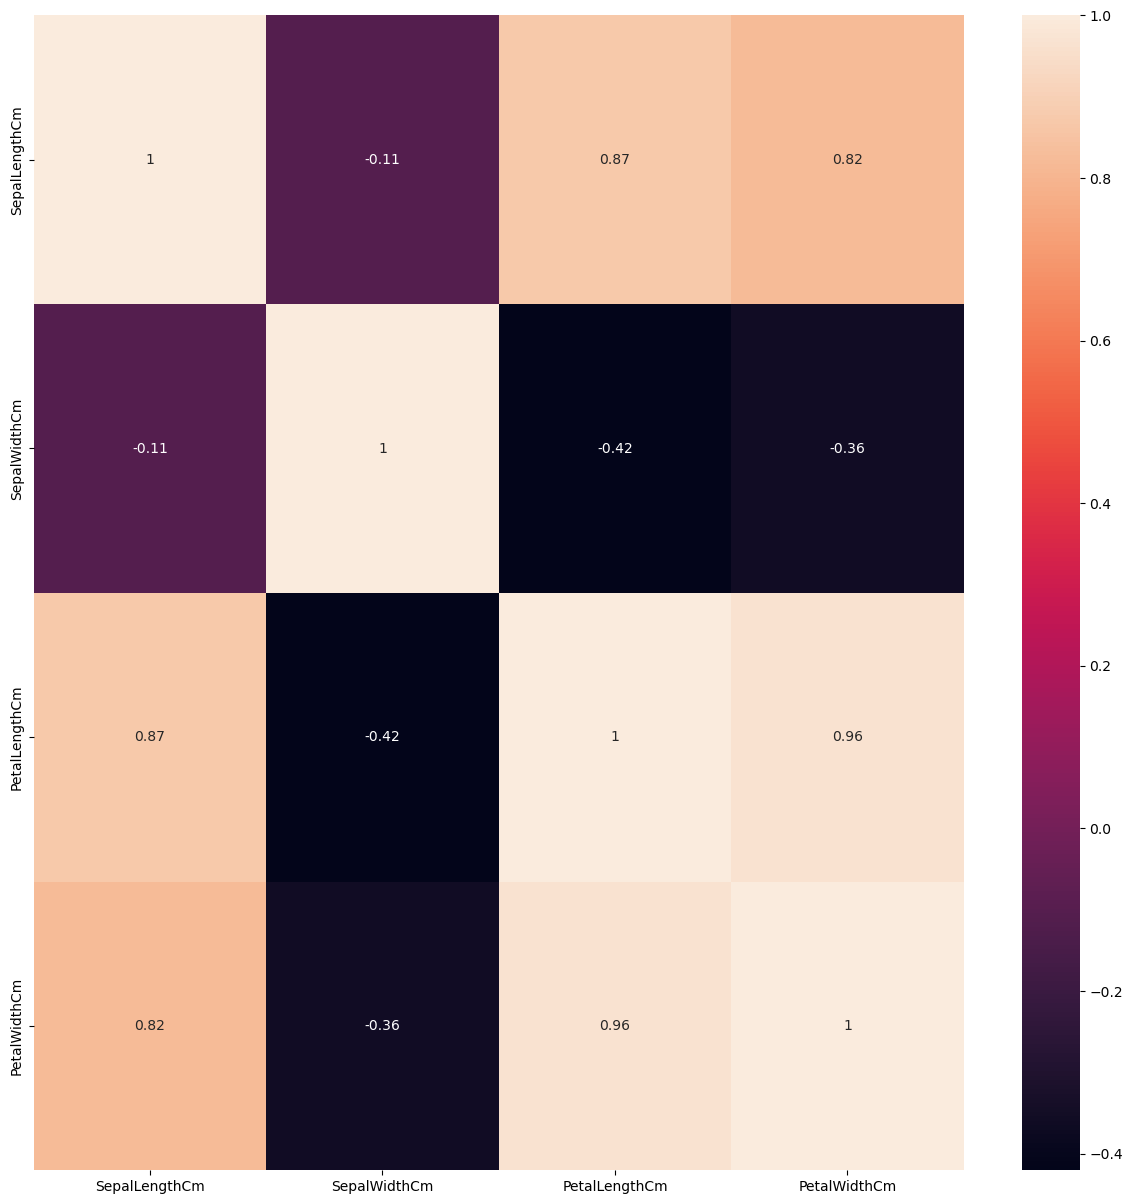

In [22]:
## Heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True, ax=ax)

### Label Encoder

In ML, we usually deal with dataset which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable format.

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


species column is now converted from word form to numaric form.

### Model Training

In [25]:
## spliting the dataset into training and testing 
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
y = df['Species']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30)

In [26]:
## logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
## print metric to get performance
print("Accuracy: ",model.score(X_test, y_test) * 100)

Accuracy:  95.55555555555556


In [29]:
## knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [30]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
## print metric to get performance
print("Accuracy: ",model.score(X_test, y_test) * 100)

Accuracy:  91.11111111111111


In [32]:
## decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
## print metric to get performance
print("Accuracy: ",model.score(X_test, y_test) * 100)

Accuracy:  95.55555555555556


<Axes: ylabel='Species'>

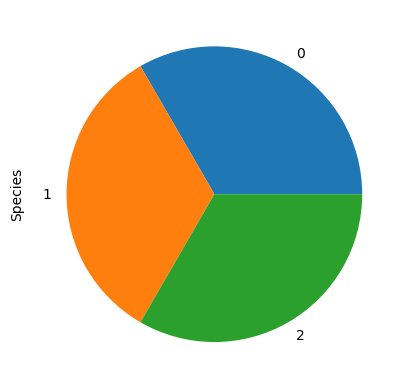

In [35]:
df['Species'].value_counts(normalize=True).plot.pie()

In [36]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64